# Project: Wrangling and Analyze Data

## Introduction


In [ ]:
WeRateDogs is a Twitter Account that rates people's dogs with a humorous comment about the dog. The ratings mostly have a denominator
of 10 while the numerator are mostly greater than 10. The data analyzed are archived tweets of the account till August 2017 as provided by Udacity.
Some of the information provided include the dog name, rating, source, dog stage(doggo, floof, pupper and puppo), etc which is not enough. 
Additional gathering of data such as retweet and favourite count, is required for analysis of the dataset using the Twitter API.

Also, the images in the archived dataset were run through a neural network to classify the breed of dogs. Some of the columns in the dataset include 
the predicted breed, the confidence rate and whether the image is a dog. 

For the wrangling process, I will be gathering data from three sources, assess the data visually and programmatically, and clean any issue discovered.
The cleaned data will be saved to a CSV file and then analyzed based on these questions:
    - Which Dog breed is the most popular based on retweet count?

    - What is the activity rate/trends in users' posts?

    - What is the most used Twitter Source?

## Data Gathering

In [5]:
# import packages
import pandas as pd
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer
%matplotlib inline

In [6]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [7]:
# create folder 
folder_name = '/Users/Durodola/Documents/datascience'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [8]:
image_prediction_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = 'image-predictions.tsv'
r = requests.get(image_prediction_url)
with open(folder_name + '/' + filename, 'wb') as f:
    f.write(r.content)

In [9]:
twitter_img_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
twitter_img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [52]:
consumer_key = 'CONSUMER KEY'
consumer_secret = 'CONSUMER SECRET'
access_token = 'ACCESS TOKEN'
access_secret = 'ACCESS SECRET'

auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret, access_token, access_secret
)

api = tweepy.API(auth, wait_on_rate_limit=True)


# Get the tweet ids from the tweet archive
tweet_ids = twitter_archive.tweet_id.values

count = 0
failed_tweets = {}
start = timer()

with open(folder_name + '/' + 'tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(f'Tweet {count} processed')
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('Success')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print('Fail')
            failed_tweets[tweet_id] = e
            pass
end = timer()
print(end - start)
print(failed_tweets)

Tweet 1 processed
Success
Tweet 2 processed
Success
Tweet 3 processed
Success
Tweet 4 processed
Success
Tweet 5 processed
Success
Tweet 6 processed
Success
Tweet 7 processed
Success
Tweet 8 processed
Success
Tweet 9 processed
Success
Tweet 10 processed
Success
Tweet 11 processed
Success
Tweet 12 processed
Success
Tweet 13 processed
Success
Tweet 14 processed
Success
Tweet 15 processed
Success
Tweet 16 processed
Success
Tweet 17 processed
Success
Tweet 18 processed
Success
Tweet 19 processed
Success
Tweet 20 processed
Fail
Tweet 21 processed
Success
Tweet 22 processed
Success
Tweet 23 processed
Success
Tweet 24 processed
Success
Tweet 25 processed
Success
Tweet 26 processed
Success
Tweet 27 processed
Success
Tweet 28 processed
Success
Tweet 29 processed
Success
Tweet 30 processed
Success
Tweet 31 processed
Success
Tweet 32 processed
Success
Tweet 33 processed
Success
Tweet 34 processed
Success
Tweet 35 processed
Success
Tweet 36 processed
Success
Tweet 37 processed
Success
Tweet 38 proc

Fail
Tweet 300 processed
Success
Tweet 301 processed
Success
Tweet 302 processed
Success
Tweet 303 processed
Success
Tweet 304 processed
Success
Tweet 305 processed
Success
Tweet 306 processed
Success
Tweet 307 processed
Success
Tweet 308 processed
Success
Tweet 309 processed
Success
Tweet 310 processed
Success
Tweet 311 processed
Success
Tweet 312 processed
Success
Tweet 313 processed
Success
Tweet 314 processed
Success
Tweet 315 processed
Success
Tweet 316 processed
Success
Tweet 317 processed
Success
Tweet 318 processed
Success
Tweet 319 processed
Success
Tweet 320 processed
Success
Tweet 321 processed
Success
Tweet 322 processed
Success
Tweet 323 processed
Success
Tweet 324 processed
Success
Tweet 325 processed
Success
Tweet 326 processed
Success
Tweet 327 processed
Success
Tweet 328 processed
Success
Tweet 329 processed
Success
Tweet 330 processed
Success
Tweet 331 processed
Success
Tweet 332 processed
Success
Tweet 333 processed
Success
Tweet 334 processed
Success
Tweet 335 proce

Success
Tweet 594 processed
Success
Tweet 595 processed
Success
Tweet 596 processed
Success
Tweet 597 processed
Success
Tweet 598 processed
Success
Tweet 599 processed
Success
Tweet 600 processed
Success
Tweet 601 processed
Success
Tweet 602 processed
Success
Tweet 603 processed
Success
Tweet 604 processed
Success
Tweet 605 processed
Success
Tweet 606 processed
Success
Tweet 607 processed
Success
Tweet 608 processed
Success
Tweet 609 processed
Success
Tweet 610 processed
Success
Tweet 611 processed
Success
Tweet 612 processed
Success
Tweet 613 processed
Success
Tweet 614 processed
Success
Tweet 615 processed
Success
Tweet 616 processed
Success
Tweet 617 processed
Success
Tweet 618 processed
Success
Tweet 619 processed
Success
Tweet 620 processed
Success
Tweet 621 processed
Success
Tweet 622 processed
Success
Tweet 623 processed
Success
Tweet 624 processed
Success
Tweet 625 processed
Success
Tweet 626 processed
Success
Tweet 627 processed
Success
Tweet 628 processed
Success
Tweet 629 pr

Success
Tweet 888 processed
Fail
Tweet 889 processed
Success
Tweet 890 processed
Success
Tweet 891 processed
Fail
Tweet 892 processed
Success
Tweet 893 processed
Success
Tweet 894 processed
Success
Tweet 895 processed
Success
Tweet 896 processed
Success
Tweet 897 processed
Success
Tweet 898 processed
Success
Tweet 899 processed
Success
Tweet 900 processed
Success
Tweet 901 processed


Rate limit reached. Sleeping for: 281


Success
Tweet 902 processed
Success
Tweet 903 processed
Success
Tweet 904 processed
Success
Tweet 905 processed
Success
Tweet 906 processed
Success
Tweet 907 processed
Success
Tweet 908 processed
Success
Tweet 909 processed
Success
Tweet 910 processed
Success
Tweet 911 processed
Success
Tweet 912 processed
Success
Tweet 913 processed
Success
Tweet 914 processed
Success
Tweet 915 processed
Success
Tweet 916 processed
Success
Tweet 917 processed
Success
Tweet 918 processed
Success
Tweet 919 processed
Success
Tweet 920 processed
Success
Tweet 921 processed
Success
Tweet 922 processed
Success
Tweet 923 processed
Success
Tweet 924 processed
Success
Tweet 925 processed
Success
Tweet 926 processed
Success
Tweet 927 processed
Success
Tweet 928 processed
Success
Tweet 929 processed
Success
Tweet 930 processed
Success
Tweet 931 processed
Success
Tweet 932 processed
Success
Tweet 933 processed
Fail
Tweet 934 processed
Success
Tweet 935 processed
Success
Tweet 936 processed
Success
Tweet 937 proce

Success
Tweet 1188 processed
Success
Tweet 1189 processed
Success
Tweet 1190 processed
Success
Tweet 1191 processed
Success
Tweet 1192 processed
Success
Tweet 1193 processed
Success
Tweet 1194 processed
Success
Tweet 1195 processed
Success
Tweet 1196 processed
Success
Tweet 1197 processed
Success
Tweet 1198 processed
Success
Tweet 1199 processed
Success
Tweet 1200 processed
Success
Tweet 1201 processed
Success
Tweet 1202 processed
Success
Tweet 1203 processed
Success
Tweet 1204 processed
Success
Tweet 1205 processed
Success
Tweet 1206 processed
Success
Tweet 1207 processed
Success
Tweet 1208 processed
Success
Tweet 1209 processed
Success
Tweet 1210 processed
Success
Tweet 1211 processed
Success
Tweet 1212 processed
Success
Tweet 1213 processed
Success
Tweet 1214 processed
Success
Tweet 1215 processed
Success
Tweet 1216 processed
Success
Tweet 1217 processed
Success
Tweet 1218 processed
Success
Tweet 1219 processed
Success
Tweet 1220 processed
Success
Tweet 1221 processed
Success
Tweet 

Success
Tweet 1471 processed
Success
Tweet 1472 processed
Success
Tweet 1473 processed
Success
Tweet 1474 processed
Success
Tweet 1475 processed
Success
Tweet 1476 processed
Success
Tweet 1477 processed
Success
Tweet 1478 processed
Success
Tweet 1479 processed
Success
Tweet 1480 processed
Success
Tweet 1481 processed
Success
Tweet 1482 processed
Success
Tweet 1483 processed
Success
Tweet 1484 processed
Success
Tweet 1485 processed
Success
Tweet 1486 processed
Success
Tweet 1487 processed
Success
Tweet 1488 processed
Success
Tweet 1489 processed
Success
Tweet 1490 processed
Success
Tweet 1491 processed
Success
Tweet 1492 processed
Success
Tweet 1493 processed
Success
Tweet 1494 processed
Success
Tweet 1495 processed
Success
Tweet 1496 processed
Success
Tweet 1497 processed
Success
Tweet 1498 processed
Success
Tweet 1499 processed
Success
Tweet 1500 processed
Success
Tweet 1501 processed
Success
Tweet 1502 processed
Success
Tweet 1503 processed
Success
Tweet 1504 processed
Success
Tweet 

Success
Tweet 1754 processed
Success
Tweet 1755 processed
Success
Tweet 1756 processed
Success
Tweet 1757 processed
Success
Tweet 1758 processed
Success
Tweet 1759 processed
Success
Tweet 1760 processed
Success
Tweet 1761 processed
Success
Tweet 1762 processed
Success
Tweet 1763 processed
Success
Tweet 1764 processed
Success
Tweet 1765 processed
Success
Tweet 1766 processed
Success
Tweet 1767 processed
Success
Tweet 1768 processed
Success
Tweet 1769 processed
Success
Tweet 1770 processed
Success
Tweet 1771 processed
Success
Tweet 1772 processed
Success
Tweet 1773 processed
Success
Tweet 1774 processed
Success
Tweet 1775 processed
Success
Tweet 1776 processed
Success
Tweet 1777 processed
Success
Tweet 1778 processed
Success
Tweet 1779 processed
Success
Tweet 1780 processed
Success
Tweet 1781 processed
Success
Tweet 1782 processed
Success
Tweet 1783 processed
Success
Tweet 1784 processed
Success
Tweet 1785 processed
Success
Tweet 1786 processed
Success
Tweet 1787 processed
Success
Tweet 

Rate limit reached. Sleeping for: 282


Success
Tweet 1802 processed
Success
Tweet 1803 processed
Success
Tweet 1804 processed
Success
Tweet 1805 processed
Success
Tweet 1806 processed
Success
Tweet 1807 processed
Success
Tweet 1808 processed
Success
Tweet 1809 processed
Success
Tweet 1810 processed
Success
Tweet 1811 processed
Success
Tweet 1812 processed
Success
Tweet 1813 processed
Success
Tweet 1814 processed
Success
Tweet 1815 processed
Success
Tweet 1816 processed
Success
Tweet 1817 processed
Success
Tweet 1818 processed
Success
Tweet 1819 processed
Success
Tweet 1820 processed
Success
Tweet 1821 processed
Success
Tweet 1822 processed
Success
Tweet 1823 processed
Success
Tweet 1824 processed
Success
Tweet 1825 processed
Success
Tweet 1826 processed
Success
Tweet 1827 processed
Success
Tweet 1828 processed
Success
Tweet 1829 processed
Success
Tweet 1830 processed
Success
Tweet 1831 processed
Success
Tweet 1832 processed
Success
Tweet 1833 processed
Success
Tweet 1834 processed
Success
Tweet 1835 processed
Success
Tweet 

Success
Tweet 2085 processed
Success
Tweet 2086 processed
Success
Tweet 2087 processed
Success
Tweet 2088 processed
Success
Tweet 2089 processed
Success
Tweet 2090 processed
Success
Tweet 2091 processed
Success
Tweet 2092 processed
Success
Tweet 2093 processed
Success
Tweet 2094 processed
Success
Tweet 2095 processed
Success
Tweet 2096 processed
Success
Tweet 2097 processed
Success
Tweet 2098 processed
Success
Tweet 2099 processed
Success
Tweet 2100 processed
Success
Tweet 2101 processed
Success
Tweet 2102 processed
Success
Tweet 2103 processed
Success
Tweet 2104 processed
Success
Tweet 2105 processed
Success
Tweet 2106 processed
Success
Tweet 2107 processed
Success
Tweet 2108 processed
Success
Tweet 2109 processed
Success
Tweet 2110 processed
Success
Tweet 2111 processed
Success
Tweet 2112 processed
Success
Tweet 2113 processed
Success
Tweet 2114 processed
Success
Tweet 2115 processed
Success
Tweet 2116 processed
Success
Tweet 2117 processed
Success
Tweet 2118 processed
Success
Tweet 

In [53]:
len(failed_tweets)

30

In [10]:
# read the tweet line by line into a list
tweet_list = []
with open('tweet_json.txt') as tweet_file:
    for line in tweet_file:
        tweet = json.loads(line)
        tweet_list.append({
            'tweet_id': tweet['id_str'],
            'retweet_count': tweet['retweet_count'],
            'favorite_count': tweet['favorite_count']
        })

In [11]:
# create a dataframe using the tweet_list
twitter_new_data = pd.DataFrame(tweet_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])
twitter_new_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6854,32829
1,892177421306343426,5165,28379
2,891815181378084864,3405,21308
3,891689557279858688,7063,35788
4,891327558926688256,7571,34209
...,...,...,...
2321,666049248165822465,35,85
2322,666044226329800704,113,243
2323,666033412701032449,35,98
2324,666029285002620928,39,111


## Assessing Data
To assess the data, I used Google Spreadsheet to make a visual assessment. I noticed the dog stage 'Floofer' was written incorrectly, some columns contain both text and Urls, etc.

In [12]:
# summary of the dataframe
twitter_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2326 non-null   object
 1   retweet_count   2326 non-null   int64 
 2   favorite_count  2326 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [13]:
# descriptive statistics about the dataframe
twitter_new_data.describe()

,retweet_count,favorite_count
count,2326.000000,2326.000000
mean,2415.754944,6851.563199
std,4089.932551,10645.108318
min,0.000000,0.000000
25%,486.000000,1194.000000
50%,1124.000000,2966.000000
75%,2794.750000,8376.250000
max,69161.000000,141320.000000


In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [16]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# check count of unique names
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

A lot of names are represented as None. This is either because some names 
are missing in the tweet text or not properly extracted

In [19]:
# check if there are duplicated tweets
twitter_archive.tweet_id.duplicated().sum()

0

In [18]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
twitter_archive.text


0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

In [21]:
twitter_img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [72]:
twitter_img_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [85]:
twitter_img_prediction.duplicated().sum()

0

#### Quality Issues

## Twitter Archive Table
 - Keep only original tweets with images(no retweets).
 - The wrong datatypes are used in these columns(tweet_id, source, and timestamp).
 - Remove irrelevant columns like retweeted_status_id, retweeted_status_user_id,   retweeted_status_timestamp,in_reply_to_status_id and in_reply_to_user_id.
 - Fix incorrect dog names.
 - Extract relevant text from the source column and remove links.
 - Fix incorrect column name 'floofer'.
 - Remove urls from text column.
 

## Twitter Image Prediction Table
 - Tweet_id should have datatype of string
 - Fix incorrect sentence case in prediction names.

 

#### Tidiness Issues

## Twitter Archive Table
 - Present the dog stage in a column.
 - Drop redundant columns used to represent dog stage.

## Twitter New Data Table
 - Merge the Twitter_new_data table with the Twitter_archive table.
 
## Twitter Image Prediction Table
 - Merge the twitter_img_pred table with the Twitter_archive table.


## Cleaning Data

In [28]:
# Make copies of original pieces of data
twitter_archive_copy = twitter_archive.copy()
twitter_new_data_copy = twitter_new_data.copy()
twitter_img_prediction_copy = twitter_img_prediction.copy()

### Quality

#### 1. Keep only original tweets with images(no retweets)

#### Define:
  - remove tweets that were retweeted.
  

#### Code

In [36]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_id.isna()]
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.in_reply_to_status_id.isna()]

#### Test

In [38]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   category           
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

#### 2. Fix wrong usage of datatypes

#### Define
  - In these columns(tweet_id, source and timestamp), the datatypes are incorrect.
  

#### Code


In [31]:
# Convert tweet_id from int to str
twitter_archive_copy.tweet_id = twitter_archive_copy.tweet_id.astype(str)
twitter_img_prediction_copy.tweet_id = twitter_img_prediction_copy.tweet_id.astype(str)

# Convert timestamp to datetime
twitter_archive_copy.timestamp = pd.to_datetime(twitter_archive_copy.timestamp)

# Convert source to category datatype
twitter_archive_copy.source = twitter_archive_copy.source.astype('category')


#### Test


In [37]:
twitter_archive_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   category           
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [86]:
twitter_img_prediction_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 3. Remove columns not needed for analysis

#### Define
  - Remove irrelevant columns like retweeted_status_id, retweeted_status_user_id,   retweeted_status_timestamp,in_reply_to_status_id and in_reply_to_user_id from Twitter Archive table.
  

#### Code


In [39]:
twitter_archive_copy.drop(columns=['retweeted_status_id', 'retweeted_status_user_id',
                                   'retweeted_status_timestamp','in_reply_to_status_id',
                                   'in_reply_to_user_id'], axis=1, inplace=True)


#### Test


In [40]:
twitter_archive_copy.columns


Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### 4. Some dog names are represented as 'a' which is invalid.

#### Define
  - Fix incorrect dog names by assigning them as None.
  

#### Code

In [41]:
twitter_archive_copy['name'].str.match('[a-z]+')

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352     True
2353     True
2354     True
2355    False
Name: name, Length: 2097, dtype: bool

In [42]:
twitter_archive_copy['name'].value_counts()

None          603
a              55
Lucy           11
Charlie        11
Oliver         10
             ... 
Lenox           1
Harvey          1
Blanket         1
Burt            1
Christoper      1
Name: name, Length: 955, dtype: int64

In [43]:
# Set the incorrect names to None.
twitter_archive_copy.loc[twitter_archive_copy['name'].str.match('[a-z]+'), 'name'] = 'None'

#### Test

In [44]:
twitter_archive_copy.loc[twitter_archive_copy['name'].str.match('[a-z]+')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [45]:
twitter_archive_copy['name'].value_counts()

None          707
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 930, dtype: int64

#### 5. Source column contain both text and links.

#### Define
  - Extract relevant text from the source column and remove links.

#### Code

In [46]:
twitter_archive_copy.source = twitter_archive_copy.source.str.extract(r'>([\w\W\s]+)<')

#### Test

In [47]:
twitter_archive_copy.source.value_counts()


Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### 6. The dog stage 'floofer' should be 'floof' instead.

#### Define
  - Fix incorrect column name and value from 'floofer' to 'floof'.

#### Code

In [48]:
twitter_archive_copy.rename({'floofer': 'floof'}, axis=1, inplace=True)

In [49]:
twitter_archive_copy.floof = twitter_archive_copy.floof.str.replace('floofer', 'floof')

#### Test

In [50]:
twitter_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floof',
       'pupper', 'puppo'],
      dtype='object')

In [51]:
twitter_archive_copy.floof.value_counts()

None     2087
floof      10
Name: floof, dtype: int64

#### 7. Text column contain both urls and text.

#### Define
  - Remove urls in text column.
    

#### Code

In [52]:
twitter_archive_copy.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [53]:
twitter_archive_copy.text = twitter_archive_copy.text.str.replace(r'https\S+', '', regex=True)

#### Test

In [54]:
for row in twitter_archive_copy.text[:5]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us 
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 


#### 8. The predicted dog type columns have a mix of sentence case.

#### Define
  - Fix incorrect sentence case in prediction names.

#### Code

In [55]:
twitter_img_prediction_copy.p1 = twitter_img_prediction_copy.p1.str.capitalize()
twitter_img_prediction_copy.p2 = twitter_img_prediction_copy.p2.str.capitalize()
twitter_img_prediction_copy.p3 = twitter_img_prediction_copy.p3.str.capitalize()

#### Test

In [56]:
twitter_img_prediction_copy.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1915,854365224396361728,https://pbs.twimg.com/media/C9tQokgUIAEETSx.jpg,1,Pembroke,0.907080,True,Cardigan,0.086272,True,Chihuahua,0.001413,True
141,668567822092664832,https://pbs.twimg.com/media/CUc64knWoAkZt70.jpg,1,Shih-tzu,0.985649,True,Lhasa,0.007078,True,Pekinese,0.003053,True
1012,709519240576036864,https://pbs.twimg.com/media/Cdi3-f7W8AUOm9T.jpg,1,Cocker_spaniel,0.414982,True,Newfoundland,0.225482,True,Flat-coated_retriever,0.196789,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1186,739238157791694849,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,Malamute,0.080901,True


### Tidiness

#### 1. Present the dog stage in a column.

#### Define
  - The doggo, floofer, pupper,puppo columns should be represented in one column (dog stage)

#### Code

In [57]:
twitter_archive_copy.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
1565,688064179421470721,2016-01-15 18:24:18+00:00,Twitter for iPhone,This is Kilo. He's a Pouncing Brioche. Really ...,https://twitter.com/dog_rates/status/688064179...,11,10,Kilo,None,None,None,None
991,748699167502000129,2016-07-01 02:06:06+00:00,Twitter for iPhone,Meet Tripp. He's being eaten by a sherk and do...,https://twitter.com/dog_rates/status/748699167...,11,10,Tripp,None,None,None,None
1014,747204161125646336,2016-06-26 23:05:29+00:00,Twitter for iPhone,This is Clark. He's deadly af. Clearly part sh...,https://twitter.com/dog_rates/status/747204161...,10,10,Clark,None,None,None,None
2219,668496999348633600,2015-11-22 18:31:19+00:00,Twitter for iPhone,This is Jo. Jo is a Swedish Queso. Tongue bigg...,https://twitter.com/dog_rates/status/668496999...,8,10,Jo,None,None,None,None
635,793601777308463104,2016-11-01 23:53:02+00:00,Twitter for iPhone,This is Dobby. I can't stop looking at her fee...,https://twitter.com/dog_rates/status/793601777...,12,10,Dobby,None,None,None,None


In [58]:
twitter_archive_copy['all_dog_stages'] = twitter_archive_copy['doggo'] + twitter_archive_copy['floof'] + twitter_archive_copy ['pupper'] + twitter_archive_copy['puppo']

In [59]:
# check for the occurence of each dog stage in the concatenated string
def assign_dog_stage(df):
    if df['all_dog_stages'].count('pupper') == 1:
        return 'pupper'
    elif df['all_dog_stages'].count('doggo') == 1:
        return 'doggo'
    elif df['all_dog_stages'].count('puppo') == 1:
        return 'puppo'
    elif df['all_dog_stages'].count('floof') == 1:
        return 'floof'
    else:
        return 'None'
    
twitter_archive_copy['dog_stage'] = twitter_archive_copy.apply(assign_dog_stage, axis=1)

#### Test

In [60]:
twitter_archive_copy.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo,all_dog_stages,dog_stage
141,864873206498414592,2017-05-17 16:00:15+00:00,Twitter for iPhone,We only rate dogs. Please don't send in Jesus....,https://twitter.com/dog_rates/status/864873206...,14,10,None,None,None,None,None,NoneNoneNoneNone,None
56,881536004380872706,2017-07-02 15:32:16+00:00,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,None,None,None,pupper,None,NoneNonepupperNone,pupper
693,786963064373534720,2016-10-14 16:13:10+00:00,Twitter for iPhone,This is Rory. He's got an interview in a few m...,https://twitter.com/dog_rates/status/786963064...,12,10,Rory,None,None,None,None,NoneNoneNoneNone,None
1729,679862121895714818,2015-12-24 03:12:15+00:00,Twitter for iPhone,"""Dammit hooman I'm jus trynna lik the fler"" 11...",https://twitter.com/dog_rates/status/679862121...,11,10,None,None,None,None,None,NoneNoneNoneNone,None
1972,673240798075449344,2015-12-05 20:41:29+00:00,Twitter for iPhone,Magical floating dog here. Very calm. Always h...,https://twitter.com/dog_rates/status/673240798...,6,10,None,None,None,None,None,NoneNoneNoneNone,None


#### 2. Drop redundant columns used to represent dog stage.

#### Define

- Drop the floof, puppo, puppo, doggo and all_dog_stages columns used to represent a dog stage.

#### Code

In [61]:
# remove the unnecessary dog stage columns
twitter_archive_copy.drop(['all_dog_stages', 'doggo', 'floof', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [62]:
twitter_archive_copy.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
335,832645525019123713,2017-02-17 17:38:57+00:00,Twitter Web Client,There's going to be a dog terminal at JFK Airp...,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,None,None
1896,674739953134403584,2015-12-09 23:58:35+00:00,Twitter for iPhone,"""🎶 DO YOU BELIEVE IN LIFE AFTER LOVE 🎶""\n11/10",https://twitter.com/dog_rates/status/674739953...,11,10,None,None
1145,727175381690781696,2016-05-02 16:38:15+00:00,Twitter for iPhone,This is Karll. He just wants to go kayaking. 1...,https://twitter.com/dog_rates/status/727175381...,10,10,Karll,None
886,759943073749200896,2016-08-01 02:45:22+00:00,Vine - Make a Scene,Here's a wicked fast pupper. 12/10 camera coul...,https://vine.co/v/5AJm5pq7Kav,12,10,None,pupper
1868,675166823650848770,2015-12-11 04:14:49+00:00,Twitter for iPhone,This is Arnold. He broke his leg saving a hand...,https://twitter.com/dog_rates/status/675166823...,10,10,Arnold,None


#### 3. Merge all tables

#### Define

- Merge the tables on the tweet_id column so all related records can be found in a table

In [ ]:
#### Code

In [63]:
twitter_archive_copy = twitter_archive_copy.merge(twitter_new_data_copy, how='left', on='tweet_id')

In [64]:
twitter_archive_copy = twitter_archive_copy.merge(twitter_img_prediction_copy, how='left', on='tweet_id', suffixes=(None, None))

#### Test

In [65]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_stage           2097 non-null   object             
 9   retweet_count       2089 non-null   float64            
 10  favorite_count      2089 non-null   float64            
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

#### 4. Clean merged table

#### Define

 - Drop rows with missing values

#### Code

In [66]:
twitter_archive_copy.dropna(axis=0, inplace=True)

#### Test

In [67]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2096
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   object             
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   source              1963 non-null   object             
 3   text                1963 non-null   object             
 4   expanded_urls       1963 non-null   object             
 5   rating_numerator    1963 non-null   int64              
 6   rating_denominator  1963 non-null   int64              
 7   name                1963 non-null   object             
 8   dog_stage           1963 non-null   object             
 9   retweet_count       1963 non-null   float64            
 10  favorite_count      1963 non-null   float64            
 11  jpg_url             1963 non-null   object             
 12  img_num             1963 non-null 

## Storing Data

In [72]:
twitter_archive_copy.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [73]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [74]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1963 non-null   int64  
 1   timestamp           1963 non-null   object 
 2   source              1963 non-null   object 
 3   text                1963 non-null   object 
 4   expanded_urls       1963 non-null   object 
 5   rating_numerator    1963 non-null   int64  
 6   rating_denominator  1963 non-null   int64  
 7   name                1963 non-null   object 
 8   dog_stage           1963 non-null   object 
 9   retweet_count       1963 non-null   float64
 10  favorite_count      1963 non-null   float64
 11  jpg_url             1963 non-null   object 
 12  img_num             1963 non-null   float64
 13  p1                  1963 non-null   object 
 14  p1_conf             1963 non-null   float64
 15  p1_dog              1963 non-null   bool   
 16  p2    

After saving to CSV, the datatypes were not preserved so, I need to convert the types

In [75]:
# Convert the datatypes
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)
twitter_archive_master.source = twitter_archive_master.source.astype('category')
twitter_archive_master.dog_stage = twitter_archive_master.dog_stage.astype('category')
twitter_archive_master[['retweet_count', 'favorite_count']] = twitter_archive_master[['retweet_count', 'favorite_count']].astype(int)

In [76]:
twitter_archive_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
972,709225125749587968,2016-03-14 03:50:21+00:00,Twitter for iPhone,This is Walker. He's a Butternut Khalifa. Appe...,https://twitter.com/dog_rates/status/709225125...,11,10,Walker,None,514,...,1.0,Labrador_retriever,0.271109,True,Pomeranian,0.150487,True,Golden_retriever,0.145578,True
1064,700890391244103680,2016-02-20 03:51:05+00:00,Twitter for iPhone,This is Chet. He's dapper af. His owners want ...,https://twitter.com/dog_rates/status/700890391...,11,10,Chet,None,499,...,1.0,White_wolf,0.166563,False,Schipperke,0.122356,True,West_highland_white_terrier,0.119247,True
1299,683391852557561860,2016-01-02 20:58:09+00:00,Twitter for iPhone,"Say hello to Jack (pronounced ""Kevin""). He's a...",https://twitter.com/dog_rates/status/683391852...,11,10,Jack,None,2136,...,1.0,French_bulldog,0.992833,True,Boston_bull,0.004749,True,Pug,0.001392,True
774,742423170473463808,2016-06-13 18:27:32+00:00,Twitter for iPhone,This is Bell. She likes holding hands. 12/10 w...,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,3351,...,1.0,Pug,0.997310,True,Brabancon_griffon,0.001186,True,French_bulldog,0.000428,True
253,831552930092285952,2017-02-14 17:17:22+00:00,Twitter for iPhone,This is Dutch. He dressed up as his favorite e...,https://twitter.com/dog_rates/status/831552930...,13,10,Dutch,None,2113,...,1.0,Chihuahua,0.257415,True,Pembroke,0.161442,True,French_bulldog,0.092143,True


In [77]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   object             
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   source              1963 non-null   category           
 3   text                1963 non-null   object             
 4   expanded_urls       1963 non-null   object             
 5   rating_numerator    1963 non-null   int64              
 6   rating_denominator  1963 non-null   int64              
 7   name                1963 non-null   object             
 8   dog_stage           1963 non-null   category           
 9   retweet_count       1963 non-null   int64              
 10  favorite_count      1963 non-null   int64              
 11  jpg_url             1963 non-null   object             
 12  img_num             1963 non-null 

In [78]:
twitter_archive_master.describe().round(3)

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1963.000,1963.000,1963.000,1963.000,1963.000,1963.000,1963.000,1963.000
mean,12.224,10.479,2206.657,7530.341,1.202,0.594,0.135,0.060
std,41.719,6.867,3946.817,11094.661,0.560,0.272,0.101,0.051
min,0.000,2.000,11.000,63.000,1.000,0.044,0.000,0.000
25%,10.000,10.000,488.000,1612.500,1.000,0.363,0.054,0.016
50%,11.000,10.000,1062.000,3400.000,1.000,0.587,0.117,0.049
75%,12.000,10.000,2520.500,9362.000,1.000,0.847,0.196,0.092
max,1776.000,170.000,69161.000,141320.000,4.000,1.000,0.488,0.273


### Insights:
1. Which Dog breed is the most popular based on retweet count?.

2. What is the activity rate/trends in users' posts?.

3. What is the most used Twitter Source?.


#### 1. Most Popular Dog based on the retweet count
Here, I will be analysing dogs based on the retweet count and by the dog breed. According to this [source](https://medium.com/@Encore/favorites-vs-retweets-and-why-one-is-more-important-than-the-other-ba12ee20e9ba), retweets are effective measures of determining interests and preferences among followers. It acts as a platform for reaching a wider audience.
Also, I decided to use the P1 column in determining the dog breed, as the confidence interval is higher than the other predictions .

Text(0, 0.5, 'Retweet')

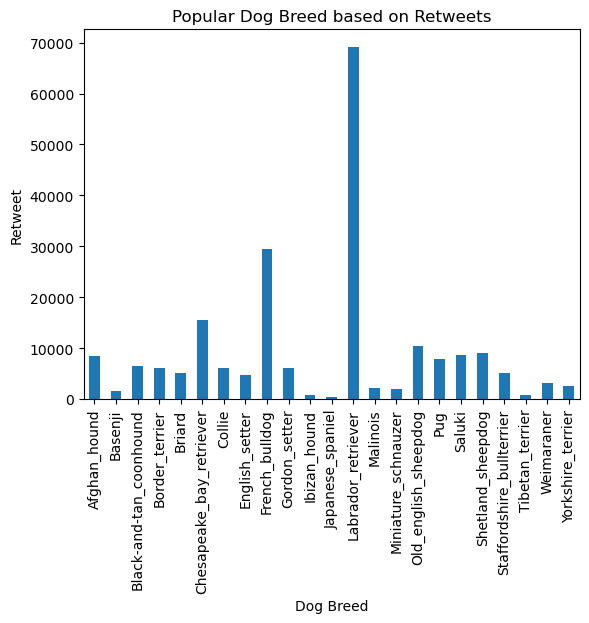

In [79]:
# plot
first_pred = twitter_archive_master[twitter_archive_master.p1_dog == True]
first_pred = first_pred.groupby('p1')['retweet_count'].max()[::5]
first_pred.plot(kind='bar')

plt.title('Popular Dog Breed based on Retweets')
plt.xlabel('Dog Breed')
plt.ylabel('Retweet')

The Labrador_retriever is the most retweeted dog breed.

#### 2. What is the activity rate of the WeRateDogs page?.
This is to check trends in users activities, that is, retweets and favourites.

In [80]:
tweet_month = twitter_archive_master['timestamp'].dt.to_period('M')
tweet_month

/Users/Durodola/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


0       2017-08
1       2017-08
2       2017-07
3       2017-07
4       2017-07
         ...   
1958    2015-11
1959    2015-11
1960    2015-11
1961    2015-11
1962    2015-11
Name: timestamp, Length: 1963, dtype: period[M]

Text(0, 0.5, 'Tweet Activity')

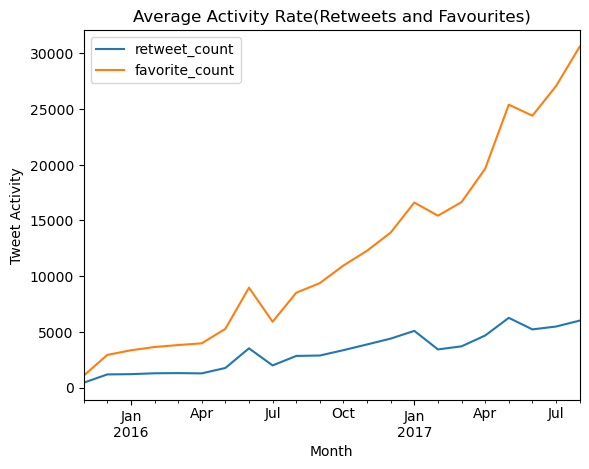

In [81]:
#plot
twitter_archive_master.groupby(tweet_month)[['retweet_count', 'favorite_count']].mean().plot()

plt.title('Average Activity Rate(Retweets and Favourites)')
plt.xlabel('Month')
plt.ylabel('Tweet Activity')


In [ ]:
From the plot, users interaction with the page has increased over time with more favourites than retweets. There is a postive 
correlation between retweet and favourite. I also noticed there are spikes at certain months of the year, one in June,
December and around May. These times signify holiday seasons where people are more relaxed to take pictures with 
their dogs. 

#### 3. What is the most used Twitter Source?.
It would be good to gain insights into the medium being used by users to interact with Twitter in posting contents.

In [82]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    1925
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

Text(0, 0.5, 'Tweet Count')

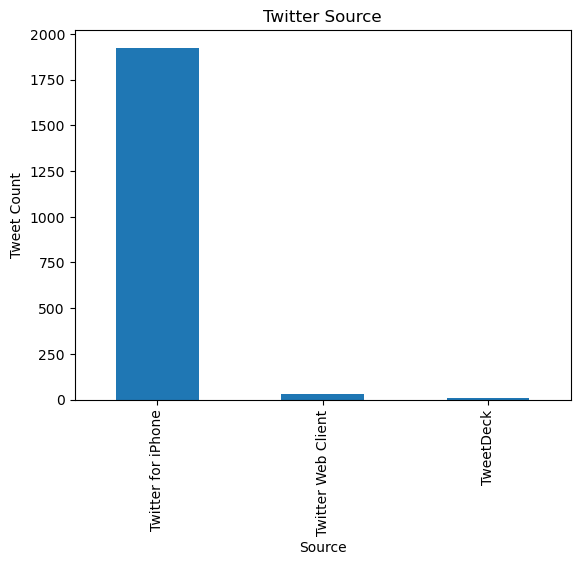

In [83]:
# plot
twitter_archive_master.source.value_counts().plot(kind='bar')

plt.title('Twitter Source')
plt.xlabel('Source')
plt.ylabel('Tweet Count')

In [ ]:
From the plot, most of the WeRateDog tweets are posted from the mobile phone specifically using an iphone. 

## Conclusion
Wrangling of data aids the analysis process. After the dataset was assessed and cleaned, I could get useful information from my analysis. I also wrote reports about my wrangling and analysis process.